In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from models import utils
from models import arx, hammerstein, dmd, dmdc, errors

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
data1 = utils.read_mat('/home/matthias/WS_all/dbm/raw/exam/ex1_data.mat')
data2 = utils.read_mat('/home/matthias/WS_all/dbm/raw/exam/ex2_data.mat')

display(data1.keys())

data1.y = data1.y.flatten()
data1.u = data1.u.flatten()
data1.t = data1.t.flatten()
display(data2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'para', 't', 'u', 'y'])

dict_keys(['__header__', '__version__', '__globals__', 'X', 't', 'u'])

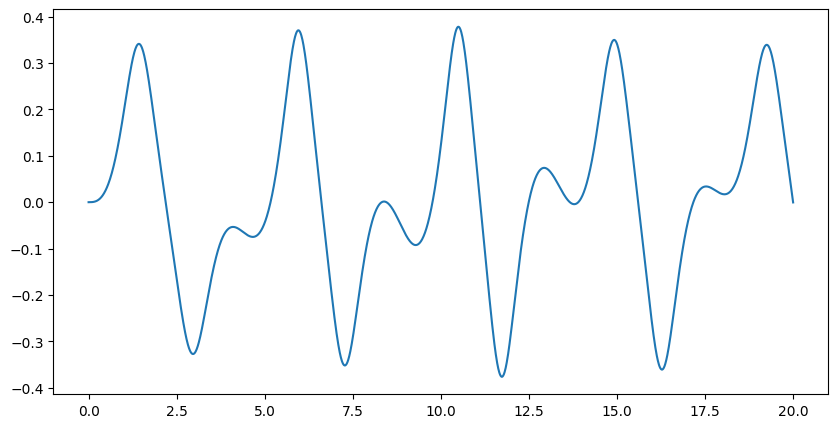

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(data1.t,data1.y)
plt.show()


In [17]:
p, loss, na,nb = arx.optimize(data1.y,data1.u,(1,10),(10,15))


Testing 45 combinations.
Progress: 2.22 %
Current iteration: 1 / 45
Iteration took 0.37 seconds, average 0.19 seconds


In [20]:
display(p, loss)
display(na,nb)

Array([ 1.9993813e+00, -1.0001903e+00,  1.9768615e-05,  6.6472567e-05,
        1.5300542e-05, -1.6182177e-05, -2.8529854e-05, -4.4955214e-05,
       -3.2037155e-05, -1.6428912e-05, -3.0638603e-06, -1.5191307e-06,
        8.7237058e-06,  3.1518415e-05,  3.4134940e-04, -2.0785401e-04],      dtype=float32)

Array(0.0482943, dtype=float32)

2

13

In [21]:
y_out = arx.simulate(jnp.array([0]), data1.u,na, nb, p.flatten())

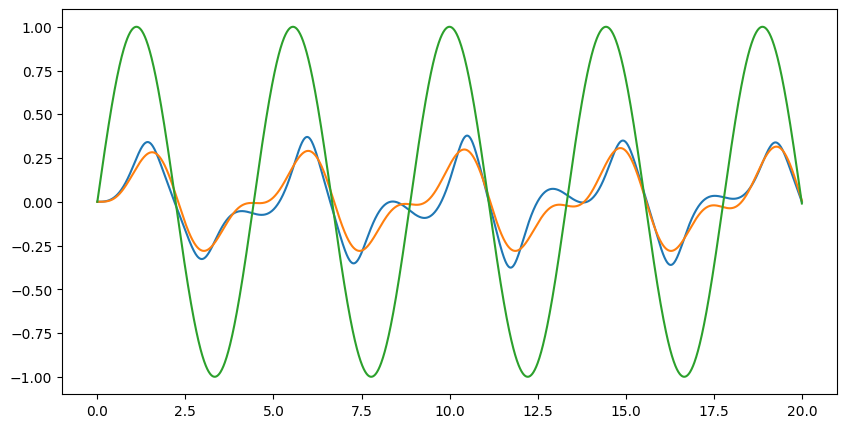

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(data1.t, data1.y, label='data')
plt.plot(data1.t, y_out, label='model')
plt.plot(data1.t, data1.u, label='input')
plt.show()

# Hammerstein


In [ ]:
hp = hammerstein.optimize(data1.y,data1.u,(1,2), (6,7), (4,5), (2,4), (0.1,0.9))

In [ ]:
params, loss, func, order, na, nb = hp
display(params, loss)
display(func, order, na, nb)

In [ ]:
yh_out = hammerstein.simulate(jnp.array([0]), data1.u,na,nb, order, func, params)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data1.t, data1.y, label='data')
plt.plot(data1.t, yh_out, label='model')
plt.plot(data1.t, data1.u, label='input')
plt.show()

# DMD

In [10]:

x = data2.X[:,:-1]
x_prime = data2.X[:,1:]
x_prime1 = x_prime[:101,:]
x_prime2 = x_prime[101:,:]

x1 = x[:101,:]
x2 = x[101:,:]

u = data2.u[:, :-1]
x0 = x[:,0]

z = jnp.linspace(0,1,x.shape[0])

display(x.shape, x_prime.shape, u.shape, x0.shape)
display(x1.shape, x2.shape, x_prime1.shape, x_prime2.shape)

(202, 5000)

(202, 5000)

(2, 5000)

(202,)

(101, 5000)

(101, 5000)

(101, 5000)

(101, 5000)

In [11]:
r, a,b, phi, lam, transform = dmdc.optimize(x1, x_prime1, u,data2.t, (1,20))
r2,a2,b2, phi2, lam2, transform2= dmdc.optimize(x2, x_prime2, u,data2.t, (1,20))

display(r,r2)

6

3

In [12]:
result = dmdc.simulate(x0[:101],u.T,a,b,transform).real.T
t = data2.t.flatten()

r2 = dmdc.simulate(x0[101:],u.T,a2,b2,transform2).real.T

(101, 5001)

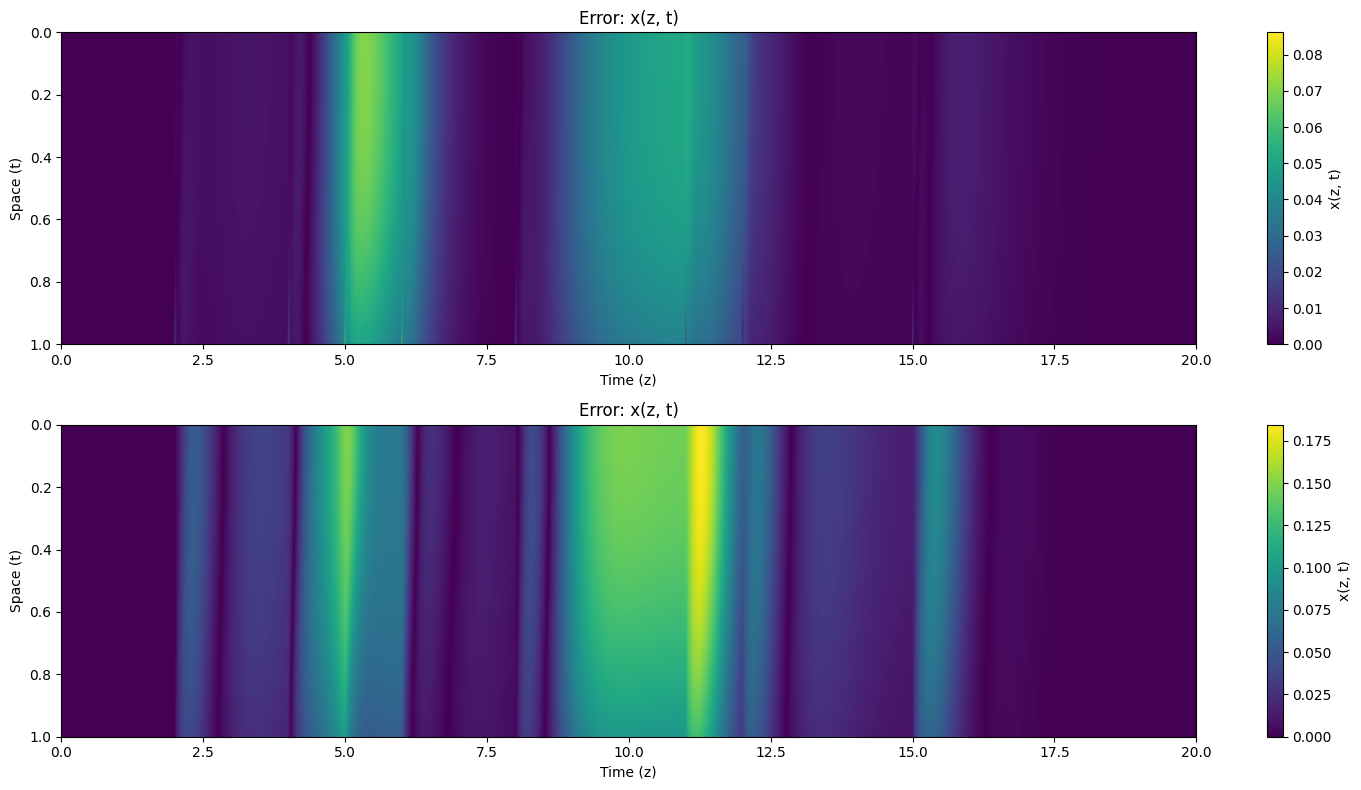

In [13]:
# Diff
diff = jnp.abs(data2.X[:101,:] - result)
diff = errors.absolute_error(data2.X[:101,:], result)
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.imshow(diff, extent=[t[0], t[-1], z[-1], z[0]], aspect='auto', cmap='viridis')
plt.colorbar(label='x(z, t)')
plt.xlabel('Time (z)')
plt.ylabel('Space (t)')
plt.title('Error: x(z, t)')



diff2 = jnp.abs(data2.X[101:,:] - r2)

diff2 = errors.absolute_error(data2.X[101:,:], r2)
display(diff2.shape)
plt.subplot(2, 1, 2)
plt.imshow(diff2, extent=[t[0], t[-1], z[-1], z[0]], aspect='auto', cmap='viridis')
plt.colorbar(label='x(z, t)')
plt.xlabel('Time (z)')
plt.ylabel('Space (t)')
plt.title('Error: x(z, t)')
plt.tight_layout()
plt.show()



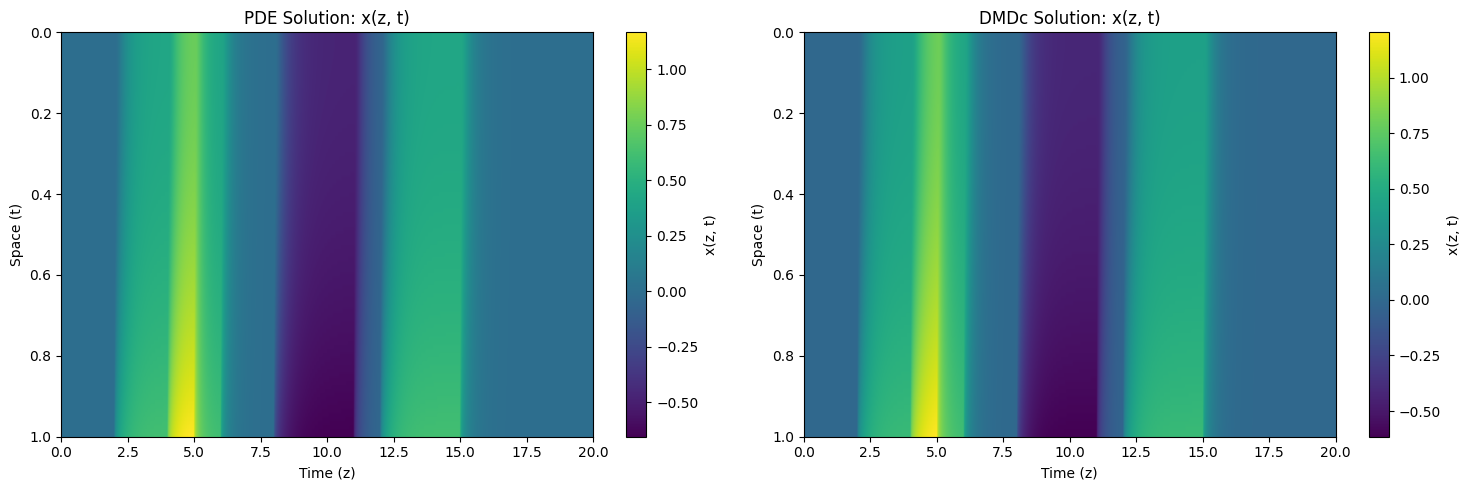

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(x[:101, :], extent=[t[0], t[-1], z[-1], z[0]], aspect='auto', cmap='viridis')
plt.colorbar(label='x(z, t)')
plt.xlabel('Time (z)')
plt.ylabel('Space (t)')
plt.title('PDE Solution: x(z, t)')

plt.subplot(1, 2, 2)
plt.imshow(result, extent=[t[0], t[-1], z[-1], z[0]], aspect='auto', cmap='viridis')
plt.colorbar(label='x(z, t)')
plt.xlabel('Time (z)')
plt.ylabel('Space (t)')
plt.title('DMDc Solution: x(z, t)')

plt.tight_layout()
plt.show()

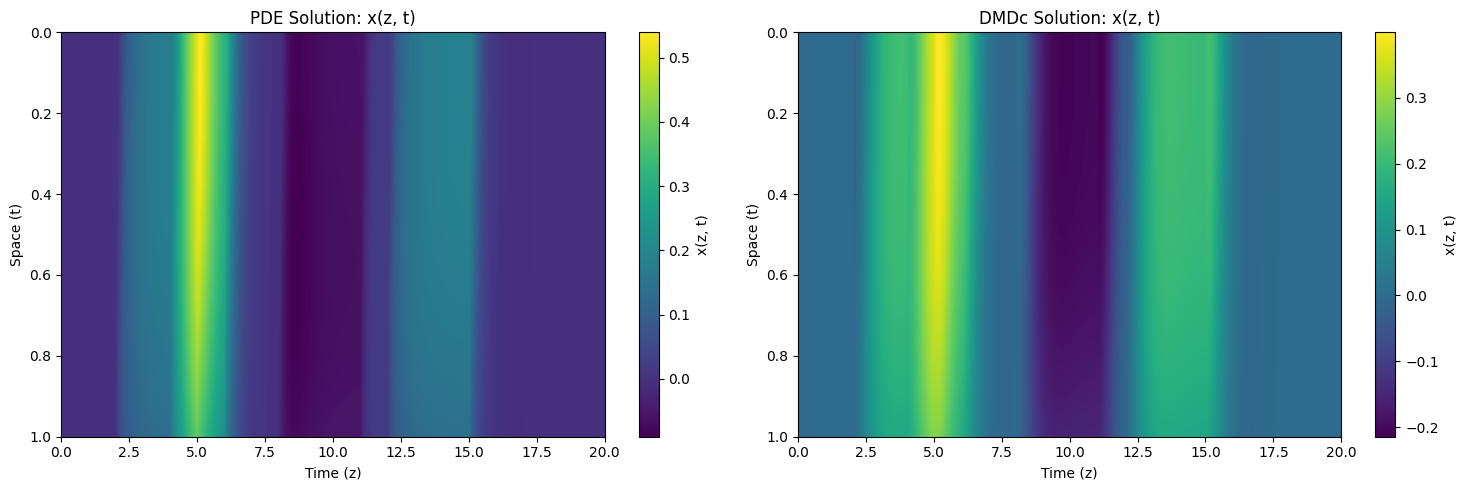

In [36]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(x[101:, :], extent=[t[0], t[-1], z[-1], z[0]], aspect='auto', cmap='viridis')
plt.colorbar(label='x(z, t)')
plt.xlabel('Time (z)')
plt.ylabel('Space (t)')
plt.title('PDE Solution: x(z, t)')

plt.subplot(1, 2, 2)
plt.imshow(r2, extent=[t[0], t[-1], z[-1], z[0]], aspect='auto', cmap='viridis')
plt.colorbar(label='x(z, t)')
plt.xlabel('Time (z)')
plt.ylabel('Space (t)')
plt.title('DMDc Solution: x(z, t)')

plt.tight_layout()
plt.show()

In [5]:
import timeit


In [ ]:


x = jnp.arange(10000).reshape(100, 100)
x_prime = jnp.arange(1, 10001).reshape(100, 100)
t = jnp.arange(101)

r = 4

# Measure the time taken for the fit function
time_taken = timeit.timeit(lambda: dmd.optimize(x, x_prime, t, (1,20)), number=10)
print(f"Time taken for fit function: {time_taken:.4f} seconds")
time_taken = timeit.timeit(lambda: dmd.optimize_(x, x_prime, t, (1, 20)), number=10)
print(f"Time taken for fit_ function: {time_taken:.4f} seconds")


Time taken for fit function: 3.8344 seconds
Time taken for fit_ function: 2.8029 seconds
